### Project Title : Predicting whether a customer will default on his/her credit card

#### Problem Description
##### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments

#### Data Description

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 

X6 = the repayment status in September, 2005; 

X7 = the repayment status in August, 2005; . . .;

X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 
9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar).

X12 = amount of bill statement in September, 2005; 

X13 = amount of bill statement in August, 2005; . . .; 

X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). 

X18 = amount paid in September, 2005;

X19 = amount paid in August, 2005; . . .;

X23 = amount paid in April, 2005.**

#### import important dependacies

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_excel('default of credit card clients.xls',header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### take some overview of data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

### preprocessing the data

**Why do we need to handle missing values?**

**The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first**

**missing values**

In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## Data cleaning

**respect to above analysis we saw zero null/missing values**

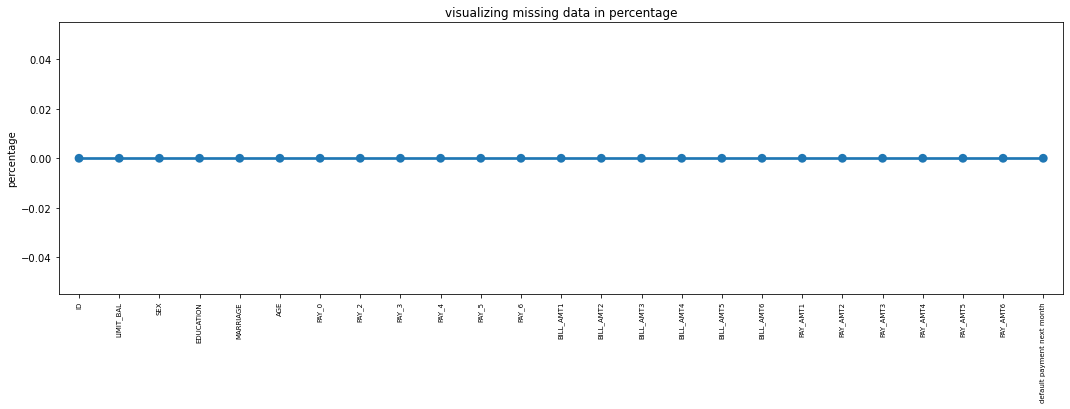

In [7]:
plt.figure(figsize=(18,5))
miss=df.isnull()/len(df)*100
sns.pointplot(data=miss)
plt.title('visualizing missing data in percentage')
plt.ylabel('percentage')
plt.xticks(rotation =90,fontsize =7)
plt.show()

In [8]:
df["EDUCATION"]=np.where(df['EDUCATION']==5 ,4, df["EDUCATION"])
df["EDUCATION"]=np.where(df['EDUCATION']==6 ,4, df["EDUCATION"])
df["EDUCATION"]=np.where(df['EDUCATION']==0 ,4, df["EDUCATION"])

In [9]:
df.EDUCATION.unique()

array([2, 1, 3, 4], dtype=int64)

In [10]:
df.MARRIAGE.unique()

array([1, 2, 3, 0], dtype=int64)

In [11]:
df.MARRIAGE=np.where(df.MARRIAGE==0 , 3,df.MARRIAGE)

*duplicate values*

In [12]:
df.duplicated().sum()

0

**Why is it important to remove duplicate records from my data?**

**"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.**

**In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.**

In [13]:
df.rename(columns={'PAY_0':'PAY_1',"default payment next month":"default_payment_next_month"},inplace=True)

In [14]:
df['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default_payment_next_month', ylabel='count'>

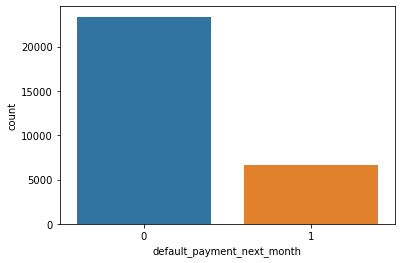

In [15]:
sns.countplot(df['default_payment_next_month'])

**From the above data analysis we can say that**

**0 - Not Default**

**1 - Default**

**Defaulters are less than the Non Defaulters in the given dataset.
As we can see from above graph that both classes are not in proportion and we have imbalanced dataset. we need to do normalize the data in next step.**

**Features description**

Breakdown of Our Features:

We have records of 30000 customers. Below are the description of all features we have.

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1 = male, 2 = female)

EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

AGE: Age in years

Scale for PAY_0 to PAY_6 :

(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

PAY_0: Repayment status in September, 2005 (scale same as above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

### **NOTE:-**

**What do 0 and -2 mean in PAY_X columns?

**From dataset documentation:**

**PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above). Notice code 0 and 2 are in the PAY_X columns but are not included in the data description. Also by doing the value_counts, it shows 0 is the most frequent observation.**

**-2: No consumption;
-1: Paid in full;
0: The use of revolving credit, meaning the payment wasn't due, which makes sense that most customers were using the revolving credit.**

### **Exploratory Data Analysis**

**categorical values**

SEX,EDUCATION ,MARRIAGE,AGE	

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SEX', ylabel='count'>

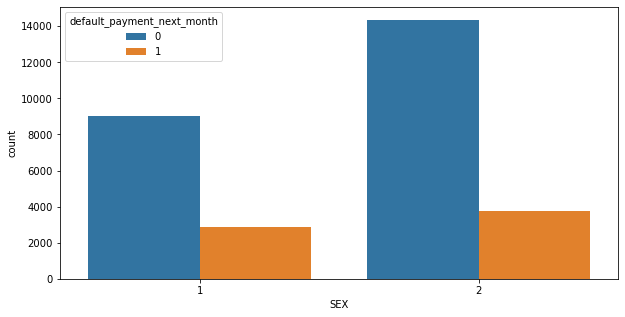

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(df['SEX'],hue=df.default_payment_next_month)


C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


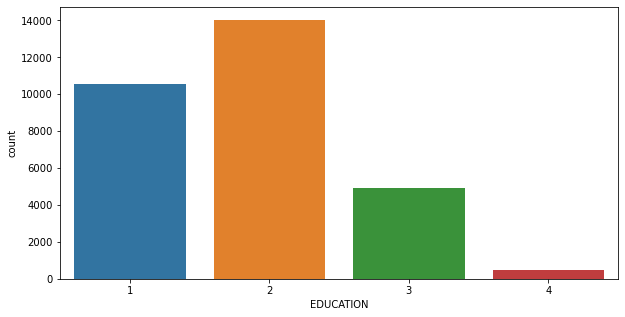

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(df['EDUCATION'])
plt.show()

**From the above data analysis we can say that**

**More number of credit holders are university students followed by Graduates and then High school students.**

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


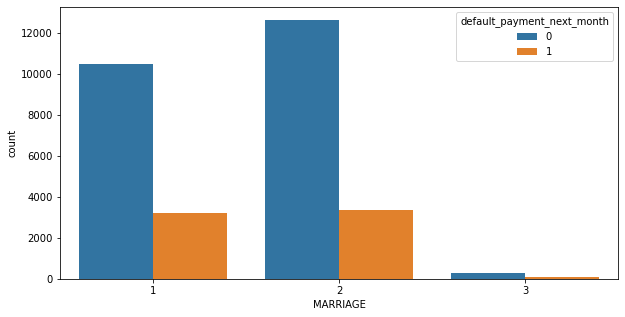

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(df['MARRIAGE'],hue=df.default_payment_next_month)
plt.show()

**From the above data analysis we can say that**

**1 - married**

**2 - single**

**3 - others**

**More number of credit cards holder are Single.**

**numerical variable**

**Age**

In [19]:
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
21      67
60      67
61      56
62      44
64      31
63      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
75       3
72       3
71       3
74       1
79       1
Name: AGE, dtype: int64

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE', ylabel='count'>

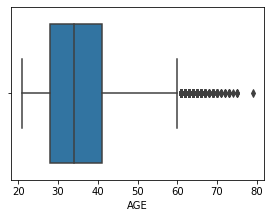

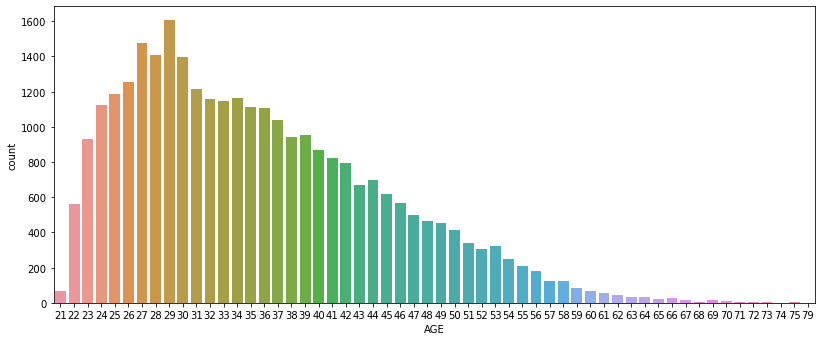

In [20]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.boxplot(df['AGE'])

plt.figure(figsize=(30,12))
plt.subplot(2,2,2)
sns.countplot(df['AGE'])

**Here we can see most of the population come under the 25 to 30 age from above analysis**

**And above 60 we can say them senior cityzen they are use frequently credit card**

In [21]:
df.groupby('default_payment_next_month')['AGE'].mean()

default_payment_next_month
0    35.417266
1    35.725738
Name: AGE, dtype: float64

<AxesSubplot:xlabel='default_payment_next_month', ylabel='AGE'>

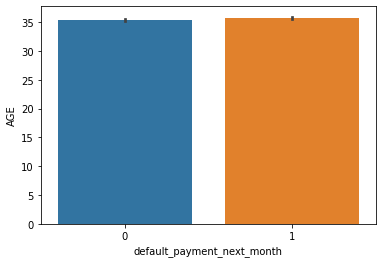

In [22]:
sns.barplot(x='default_payment_next_month',y='AGE',data=df)

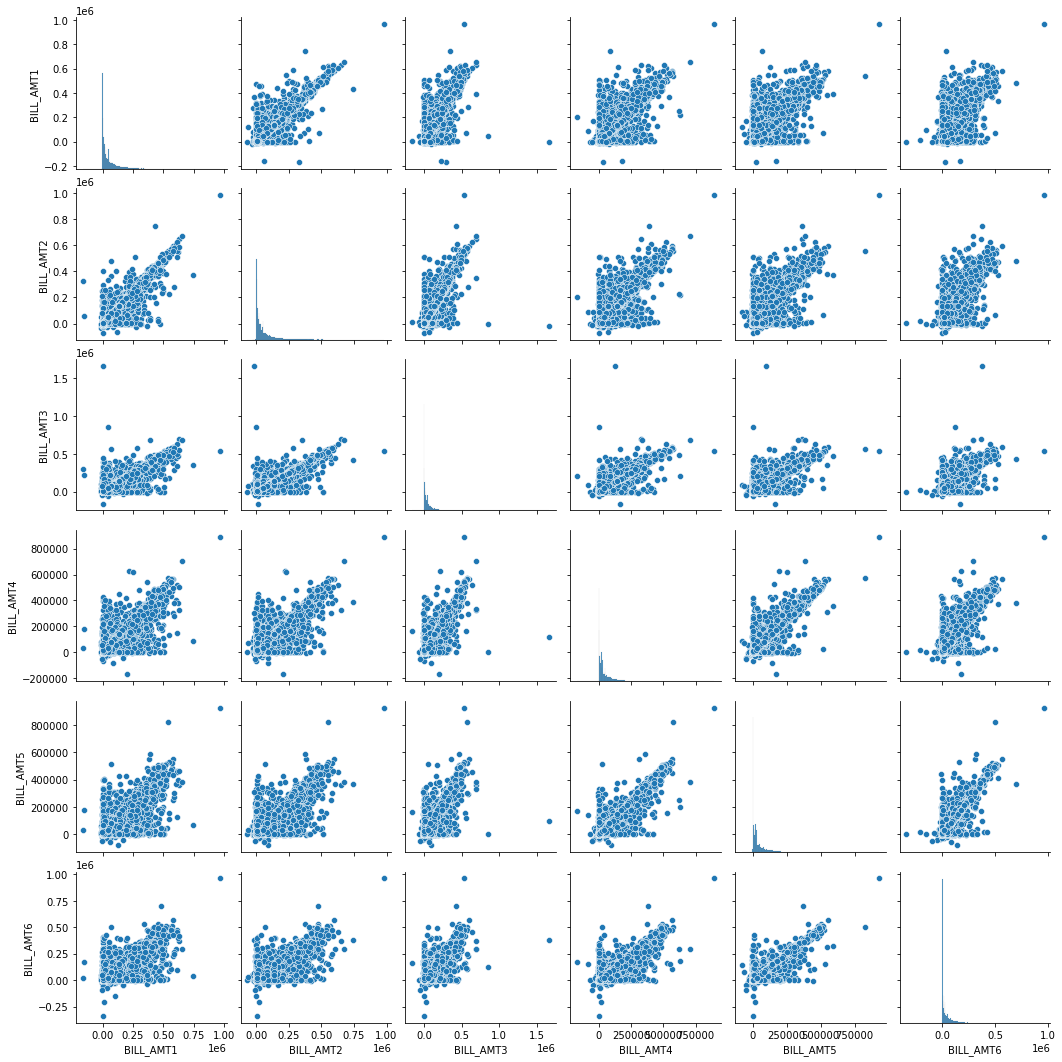

In [23]:
total_amnt=df[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]]

sns.pairplot(data=total_amnt)

<AxesSubplot:xlabel='PAY_6', ylabel='count'>

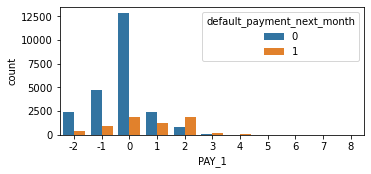

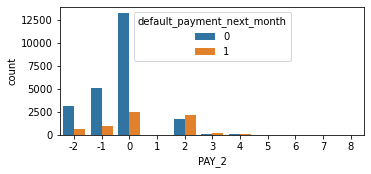

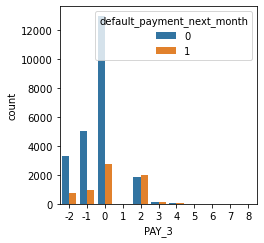

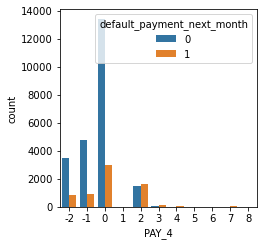

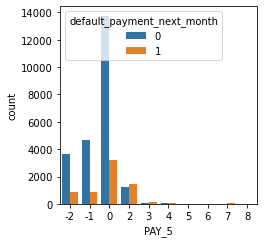

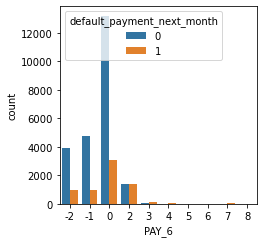

In [24]:
plt.figure(figsize=(12,8))
plt.subplot(3,2,1)
sns.countplot(x="PAY_1", hue="default_payment_next_month",data=df)

plt.figure(figsize=(12,8))
plt.subplot(3,2,2)
sns.countplot(x="PAY_2", hue="default_payment_next_month",data=df)

plt.figure(figsize=(12,8))
plt.subplot(2,3,3)
sns.countplot(x="PAY_3", hue="default_payment_next_month",data=df)

plt.figure(figsize=(12,8))
plt.subplot(2,3,4)
sns.countplot(x="PAY_4", hue="default_payment_next_month",data=df)

plt.figure(figsize=(12,8))
plt.subplot(2,3,5)
sns.countplot(x="PAY_5", hue="default_payment_next_month",data=df)

plt.figure(figsize=(12,8))
plt.subplot(2,3,6)
sns.countplot(x="PAY_6", hue="default_payment_next_month",data=df)

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


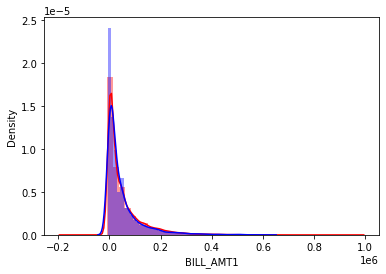

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


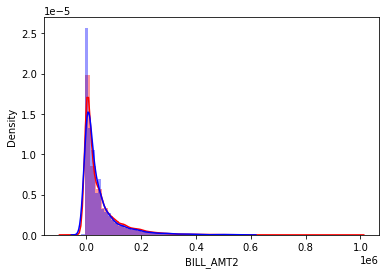

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


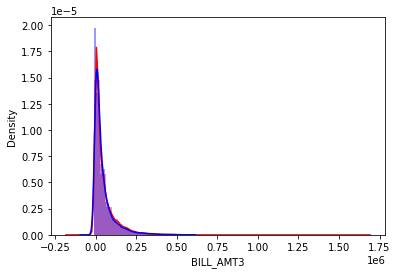

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


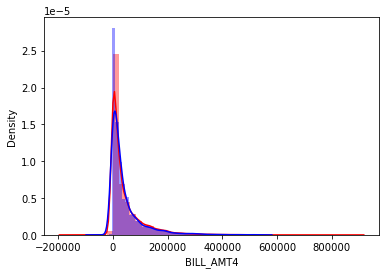

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


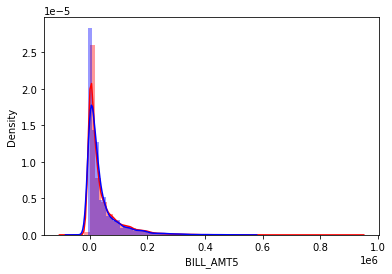

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


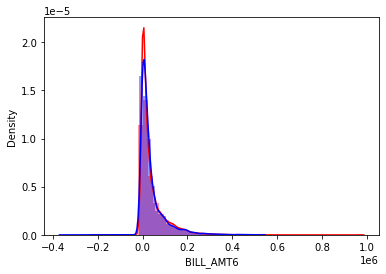

In [25]:
amnt1=df[df['default_payment_next_month']==0]
amnt2=df[df['default_payment_next_month']==1]
ad=["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]
for i in ad:
    sns.distplot(amnt1[i],color='r')
    sns.distplot(amnt2[i],color='b')
    plt.show()

### Bivariate Analysis

#### what is bivariate analysis

***Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association***

#### Sex and default_payment_next_month

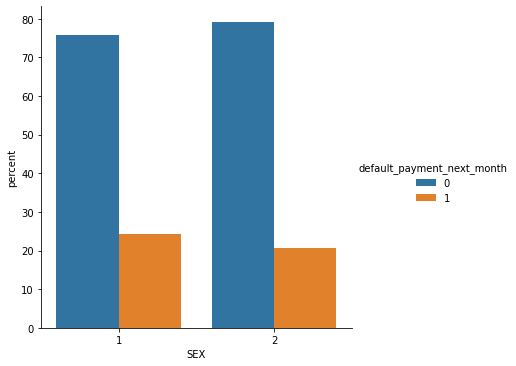

In [26]:
a,b = 'SEX', 'default_payment_next_month'

(df
.groupby(a)[b]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=a,y='percent',hue=b,kind='bar'))

**It is evident from the above graph that the number of defaulter have high proportion of males.**

#### MARRIAGE and default_payment_next_month

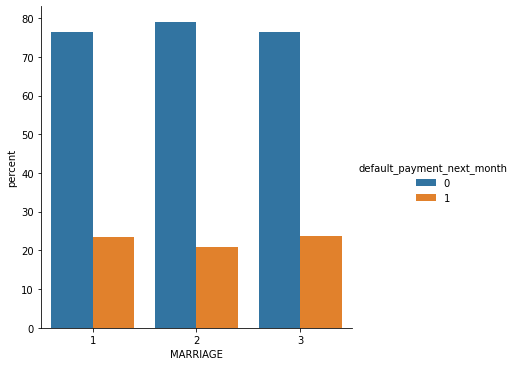

In [27]:
#plotting the cat plot to vizualize the data distribution related to the default_payment_next_month
a,b = 'MARRIAGE', 'default_payment_next_month'

(df
.groupby(a)[b]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=a,y='percent',hue=b,kind='bar'))

#### EDUCATION and default_payment_next_month

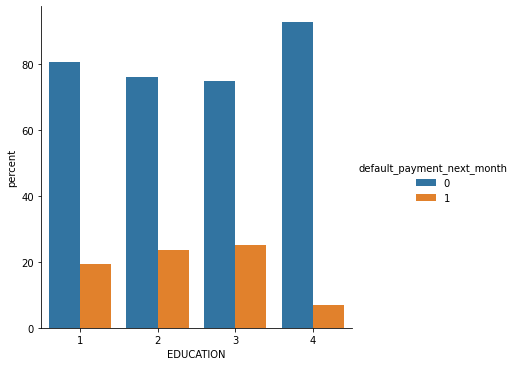

In [28]:
a,b = 'EDUCATION', 'default_payment_next_month'

(df
.groupby(a)[b]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=a,y='percent',hue=b,kind='bar'))

**From the above plot it is clear that those people who are other students have higher default payment wrt graduates and university people**

### Age and default_payment_next_month

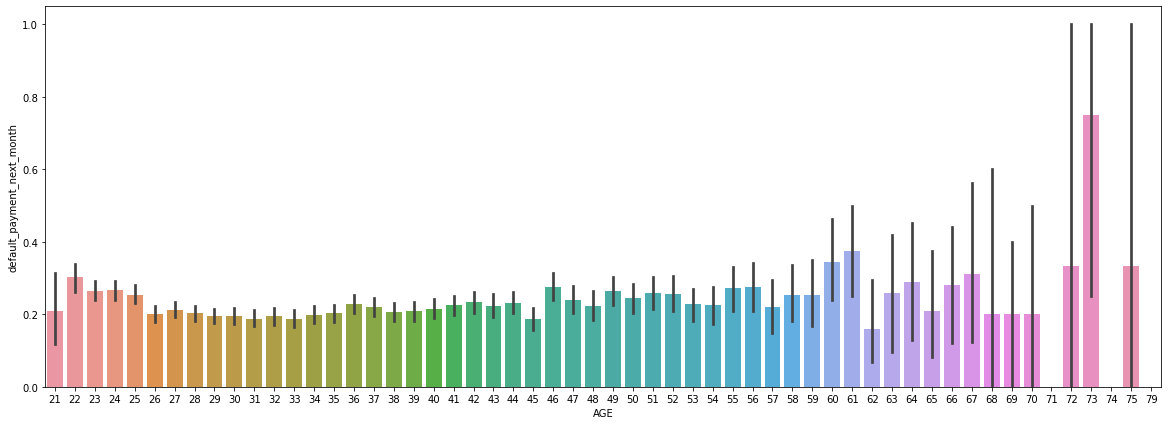

In [29]:
plt.figure(figsize=(20,7))
sns.barplot(x="AGE",y='default_payment_next_month',data=df)
plt.show()

**Slightly higher defaulter rate in 60's.**

### Checking of Correlation between variables
**we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables**

<AxesSubplot:>

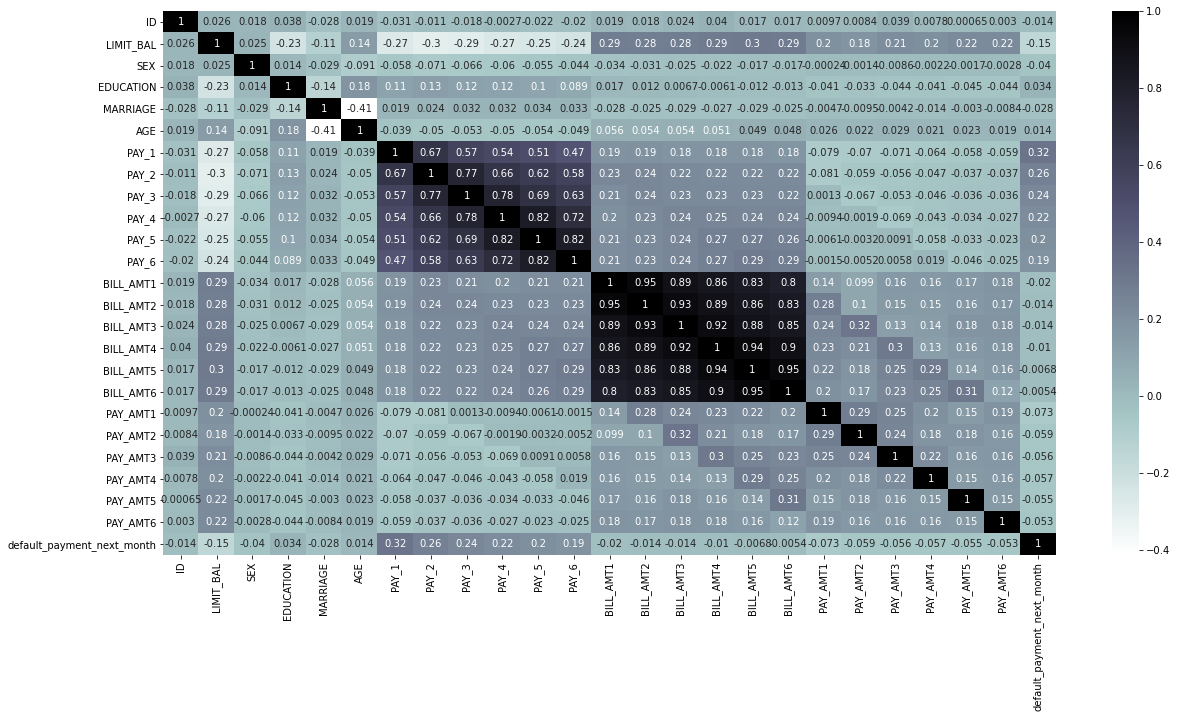

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='bone_r')

#### It seems from the above graph is there are some negatively correlated feature like age but we cannot blindly remove this feature because it could be important feature for prediction.
#### ID is unimportant and it has no role in prediction so we will remove it.

### SMOTE

**In our data set we have Imbalanced Data Distribution in our dependent variable, it generally happens when observations in one of the class are much higher i.e not defaulter or lower than the other classes i.e defaulter.**

**As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution.**

**Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when the minority class has a negligible or very lesser recall.**



**SMOTE**

**SMOTE (Synthetic Minority Oversampling Technique) – Oversampling is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.**

In [16]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [17]:
xsmote,ysmote=smote.fit_resample(df.drop(columns='default_payment_next_month'),df['default_payment_next_month'])

In [18]:
print('after resampling',xsmote.shape,)
print('before resampling',df.shape)

after resampling (46728, 24)
before resampling (30000, 25)


In [19]:
columns=df.columns.to_list()
columns.pop()


'default_payment_next_month'

In [20]:
balance_df=pd.DataFrame(xsmote,columns=columns)
balance_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,20039,30000,1,2,2,22,2,1,1,2,2,2,26158,25773,28237,27417,30457,29540,339,3257,0,3591,7,337
46724,2130,30000,1,1,1,52,0,0,1,2,1,0,23905,26448,27750,27189,26772,27467,3206,1994,137,137,1138,1589
46725,12003,180000,2,2,1,27,0,0,0,0,0,0,89812,90716,94111,103047,104342,109386,3305,5875,12803,3808,7678,3547
46726,22080,170000,2,1,1,28,1,0,0,0,0,0,169969,172459,172564,166186,167469,164031,10634,7357,3328,6814,5894,6886


In [21]:
balance_df['default_payment']=ysmote

In [22]:
balance_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,20039,30000,1,2,2,22,2,1,1,2,2,2,26158,25773,28237,27417,30457,29540,339,3257,0,3591,7,337,1
46724,2130,30000,1,1,1,52,0,0,1,2,1,0,23905,26448,27750,27189,26772,27467,3206,1994,137,137,1138,1589,1
46725,12003,180000,2,2,1,27,0,0,0,0,0,0,89812,90716,94111,103047,104342,109386,3305,5875,12803,3808,7678,3547,1
46726,22080,170000,2,1,1,28,1,0,0,0,0,0,169969,172459,172564,166186,167469,164031,10634,7357,3328,6814,5894,6886,1


C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default_payment', ylabel='count'>

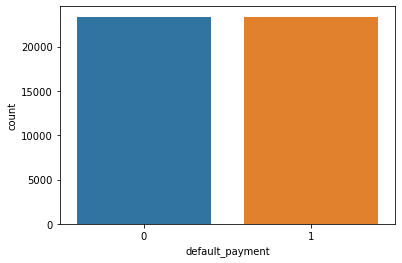

In [23]:
sns.countplot(balance_df['default_payment'])

In [24]:
copy_df=balance_df.copy()

**Replace the categorical values for one hot encoding**

In [25]:
copy_df['SEX']=copy_df["SEX"].apply(lambda x: 'male' if x==1 else ('female' if x==2 else copy_df['SEX']))

In [26]:
copy_df['MARRIAGE']=copy_df['MARRIAGE'].replace({1:'married',2:'single',3:'other'})

In [27]:
copy_df['EDUCATION']=copy_df['EDUCATION'].replace({1 :'graduate school', 2 :'university', 3 : 'high school', 4 : 'others'})

In [28]:
SDf=copy_df[['SEX','MARRIAGE','EDUCATION']]
for i in SDf:
    print(i)
    print(copy_df[i].unique())

SEX
['female' 'male']
MARRIAGE
['married' 'single' 'other']
EDUCATION
['university' 'graduate school' 'high school' 'others']


In [29]:
copy_df.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
copy_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
copy_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [30]:
copy_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment
0,1,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,20039,30000,male,university,single,22,2,1,1,2,2,2,26158,25773,28237,27417,30457,29540,339,3257,0,3591,7,337,1
46724,2130,30000,male,graduate school,married,52,0,0,1,2,1,0,23905,26448,27750,27189,26772,27467,3206,1994,137,137,1138,1589,1
46725,12003,180000,female,university,married,27,0,0,0,0,0,0,89812,90716,94111,103047,104342,109386,3305,5875,12803,3808,7678,3547,1
46726,22080,170000,female,graduate school,married,28,1,0,0,0,0,0,169969,172459,172564,166186,167469,164031,10634,7357,3328,6814,5894,6886,1


In [31]:
 copy_df=copy_df.drop(columns='ID')

### One Hot encoding

**One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.**

**here we perform one hot encoding on 'EDUCATION','MARRIAGE','PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'**

In [32]:
copy_df=pd.get_dummies(copy_df,columns=['EDUCATION','MARRIAGE'])

In [33]:
copy_df=pd.get_dummies(copy_df,columns=['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'],drop_first=True)

In [34]:
copy_df['SEX']=copy_df['SEX'].replace({'female':0,'male':1})

In [35]:
copy_df.columns.to_list()

['LIMIT_BAL',
 'SEX',
 'AGE',
 'BILL_AMT_SEPT',
 'BILL_AMT_AUG',
 'BILL_AMT_JUL',
 'BILL_AMT_JUN',
 'BILL_AMT_MAY',
 'BILL_AMT_APR',
 'PAY_AMT_SEPT',
 'PAY_AMT_AUG',
 'PAY_AMT_JUL',
 'PAY_AMT_JUN',
 'PAY_AMT_MAY',
 'PAY_AMT_APR',
 'default_payment',
 'EDUCATION_graduate school',
 'EDUCATION_high school',
 'EDUCATION_others',
 'EDUCATION_university',
 'MARRIAGE_married',
 'MARRIAGE_other',
 'MARRIAGE_single',
 'PAY_SEPT_-1',
 'PAY_SEPT_0',
 'PAY_SEPT_1',
 'PAY_SEPT_2',
 'PAY_SEPT_3',
 'PAY_SEPT_4',
 'PAY_SEPT_5',
 'PAY_SEPT_6',
 'PAY_SEPT_7',
 'PAY_SEPT_8',
 'PAY_AUG_-1',
 'PAY_AUG_0',
 'PAY_AUG_1',
 'PAY_AUG_2',
 'PAY_AUG_3',
 'PAY_AUG_4',
 'PAY_AUG_5',
 'PAY_AUG_6',
 'PAY_AUG_7',
 'PAY_AUG_8',
 'PAY_JUL_-1',
 'PAY_JUL_0',
 'PAY_JUL_1',
 'PAY_JUL_2',
 'PAY_JUL_3',
 'PAY_JUL_4',
 'PAY_JUL_5',
 'PAY_JUL_6',
 'PAY_JUL_7',
 'PAY_JUL_8',
 'PAY_JUN_-1',
 'PAY_JUN_0',
 'PAY_JUN_1',
 'PAY_JUN_2',
 'PAY_JUN_3',
 'PAY_JUN_4',
 'PAY_JUN_5',
 'PAY_JUN_6',
 'PAY_JUN_7',
 'PAY_JUN_8',
 'PAY_MAY_-1',

In [36]:
copy_df

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_other,MARRIAGE_single,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,PAY_AUG_5,PAY_AUG_6,PAY_AUG_7,PAY_AUG_8,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_1,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,30000,1,22,26158,25773,28237,27417,30457,29540,339,3257,0,3591,7,337,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
46724,30000,1,52,23905,26448,27750,27189,26772,27467,3206,1994,137,137,1138,1589,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
46725,180000,0,27,89812,90716,94111,103047,104342,109386,3305,5875,12803,3808,7678,3547,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
46726,170000,0,28,169969,172459,172564,166186,167469,164031,10634,7357,3328,6814,5894,6886,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### import important dependencies

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [38]:
from sklearn.metrics import accuracy_score,accuracy_score,confusion_matrix,recall_score,precision_score,f1_score

**Performance Metrics**

**Precision is a good metric to use when the costs of false positive(FP) is high.**

**Precision = TP / (TP + FP)**

**Recall is a good metric to use when the cost associated with false negative(FN) is high.**

**Recall = TP / (TP + FN)**

**F1-score is a weighted average of precision and recall. Thus, it considers FP and FN. This metric is very useful when we have uneven class distribution, as it seeks a balance between precision and recall.**

**F1-score = 2 (precision recall) / (precision + recall)**

### **Note**

**In this classification problem there is a high cost for the bank when a default credit card is predicted as non-default, since no actions can be taken. Thus, we will give recall more importance .**

### Logistic Regression

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()

In [40]:
df_logistic=copy_df.copy()

In [41]:
x=df_logistic.drop(columns=['default_payment'],axis=1)
y=df_logistic['default_payment']

In [42]:
x=scaler.fit_transform(x)

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [44]:
x_train

array([[ 0.40533114,  1.01010931,  0.86502583, ..., -0.03525292,
        -0.04489651, -0.00654238],
       [-0.90679359,  1.01010931, -0.04426232, ..., -0.03525292,
        -0.04489651, -0.00654238],
       [ 0.36662711,  1.01010931, -1.29453351, ..., -0.03525292,
        -0.04489651, -0.00654238],
       ...,
       [-0.98638238, -0.98999187, -0.95355046, ..., -0.03525292,
        -0.04489651, -0.00654238],
       [-0.82720479, -0.98999187,  0.75136481, ..., -0.03525292,
        -0.04489651, -0.00654238],
       [-0.11090565, -0.98999187, -0.15792333, ..., -0.03525292,
        -0.04489651, -0.00654238]])

In [45]:
Lr=LogisticRegression().fit(x_train,y_train)
test_pred_Lr=Lr.predict(x_test)
train_pred_Lr=Lr.predict(x_train)
accuracy_score(y_test,test_pred_Lr)
print(accuracy_score(y_train,train_pred_Lr))

0.7554495704546149


C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
para={'penalty':['l1','l2'],
        'C':[0.1,0.0003,0.004,0.2,0.005,0.002,1,.5,100]}

In [48]:
Lr_grid=GridSearchCV(estimator=LogisticRegression(),param_grid=para,cv=3,n_jobs=-1,verbose=3)

In [49]:
Lr_grid.fit(x_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
V

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.0003, 0.004, 0.2, 0.005, 0.002, 1, 0.5,
                               100],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [51]:
Lr_grid.best_params_

{'C': 0.5, 'penalty': 'l2'}

In [52]:
Lr_grid.best_score_

0.753890366565777

In [53]:
y_pred_Lr_grid=Lr_grid.predict(x_test)
y_pred_Lr_train=Lr_grid.predict(x_train)

In [54]:
accuracy_score_lr=accuracy_score(y_pred_Lr_grid,y_test)
rcall_lr=recall_score(y_test,y_pred_Lr_grid)
precision_score_lr=precision_score(y_test,y_pred_Lr_grid)
f1_score_lr=f1_score(y_test,y_pred_Lr_grid)

print('accuracy score for logistic regrresion',accuracy_score_lr)
print('the recall on the test data',rcall_lr)
print('precision on the test data',precision_score_lr)
print('f1 score of test data',f1_score_lr)

accuracy score for logistic regrresion 0.7528354376203723
the recall on the test data 0.6831613176869786
precision on the test data 0.797886393659181
f1 score of test data 0.7360804326300557


In [55]:
accuracy_score_lr_train=accuracy_score(y_train,y_pred_Lr_train)
rcall_lr_train=recall_score(y_train,y_pred_Lr_train)
precision_score_lr_train=precision_score(y_train,y_pred_Lr_train)
f1_score_lr_train=f1_score(y_train,y_pred_Lr_train)

print('accuracy score for logistic regrresion',accuracy_score_lr_train)
print('the recall on the train data',rcall_lr_train)
print('precision on the train data',precision_score_lr_train)
print('f1 score of train data',f1_score_lr_train)

accuracy score for logistic regrresion 0.755357852578801
the recall on the train data 0.6892149039346879
precision on the train data 0.7925460577398179
f1 score of train data 0.7372775625451442


**We have implemented logistic regression and we getting f1-sore approx 73%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.**

### Confusion Matrix
**Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.**



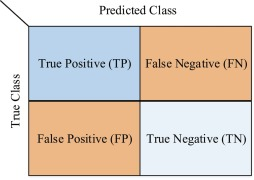

In [56]:
cm_rf=confusion_matrix(y_train,y_pred_Lr_train)
cm_rf

array([[13479,  2939],
       [ 5063, 11228]], dtype=int64)

<AxesSubplot:>

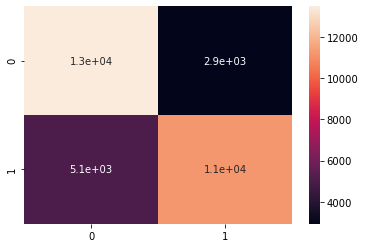

In [57]:
sns.heatmap(cm_rf,annot=True)

### Feature importances

In [58]:
feature=Lr_grid.best_estimator_.coef_[0]
feature=np.sort(feature).ravel()
feature

array([-3.92364342e-01, -2.46894575e-01, -2.42478034e-01, -2.41903434e-01,
       -2.35519138e-01, -2.14516983e-01, -2.10657415e-01, -1.70127353e-01,
       -1.15869640e-01, -9.54598739e-02, -9.30100810e-02, -8.98969597e-02,
       -8.76980555e-02, -8.67533049e-02, -7.17299723e-02, -6.98310130e-02,
       -5.94690377e-02, -5.92907223e-02, -5.44181789e-02, -4.63644975e-02,
       -4.63370190e-02, -4.25494802e-02, -3.81643580e-02, -3.80882056e-02,
       -3.63162783e-02, -3.42037501e-02, -3.17983015e-02, -3.03755093e-02,
       -2.41354001e-02, -9.83105547e-03, -4.41424249e-03, -3.11581387e-03,
       -2.27796428e-03, -2.25574761e-03, -1.15840644e-03,  6.34024123e-03,
        8.66147871e-03,  9.47020312e-03,  1.11912616e-02,  1.19587648e-02,
        1.27680093e-02,  1.45853396e-02,  1.64741616e-02,  1.70023997e-02,
        2.53950744e-02,  2.63411536e-02,  2.86020024e-02,  2.96595396e-02,
        3.04260954e-02,  3.88352572e-02,  3.93913385e-02,  4.07129432e-02,
        4.39999031e-02,  

### Random Forest Classifier

In [59]:
#define the X and y value
X = copy_df.drop(['default_payment'],axis=1)
Y = copy_df['default_payment']

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y)

In [61]:
rfr=RandomForestClassifier().fit(xtrain,ytrain)
rfr

RandomForestClassifier()

In [62]:
rfr_pred_test=rfr.predict(xtest)
rrf_pred_train=rfr.predict(xtrain)

In [63]:
print(accuracy_score(ytest,rfr_pred_test))
print(accuracy_score(ytrain,rrf_pred_train))

0.8362437938709125
0.9992866518290248


In [64]:
accuracy_score_rfr=accuracy_score(ytest,rfr_pred_test)
rcall_rfr=recall_score(ytest,rfr_pred_test)
precision_score_rfr=precision_score(ytest,rfr_pred_test)
f1_score_rfr=f1_score(ytest,rfr_pred_test)

print('accuracy score for random forest clssifier',accuracy_score_rfr)
print('the recall on the test data',rcall_rfr)
print('precision on the test data',precision_score_rfr)
print('f1 score of test data',f1_score_rfr)

accuracy score for random forest clssifier 0.8362437938709125
the recall on the test data 0.8064735945485519
precision on the test data 0.859009254218835
f1 score of test data 0.8319128371847816


In [65]:
cm_rf=confusion_matrix(ytrain,rrf_pred_train)
cm_rf

array([[17536,    16],
       [    9, 17485]], dtype=int64)

accuracy score for logistic regrresion : **0.8379558294812532**

the recall on the test data : **0.8079890279444539**

precision on the test data : **0.8590958804228946**

f1 score of test data : **0.8327590776570368**


**We have implimented random forest classifier on train we got about 1.0% of accuracy and on test data aprox 83% which depicts our model is overfiting . However F score about 83% which is not bad let's see different model might be perform well**

<AxesSubplot:>

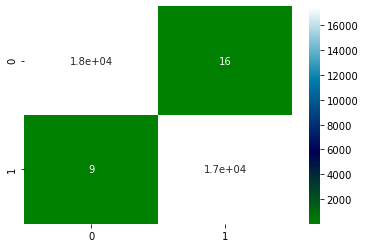

In [66]:
sns.heatmap(cm_rf,annot=True,cmap='ocean')

In [67]:
# para={'n_estimators':[100,150,200,300],'max_depth':[5,10,15,20,25,30]}
para = {'n_estimators': [100,150,200,250], 'max_depth': [10,20,25,30]}

In [68]:
grid=GridSearchCV(RandomForestClassifier(),param_grid=para,n_jobs=-1,cv=3,verbose=3,scoring='accuracy')
grid.fit(xtrain,ytrain)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 25, 30],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='accuracy', verbose=3)

In [69]:
grid.best_estimator_

RandomForestClassifier(max_depth=30, n_estimators=250)

In [70]:
grid.best_score_

0.8258003766478342

In [71]:
optimal_clf=grid.best_estimator_

In [72]:
test_data=optimal_clf.predict(xtest)
train_data=optimal_clf.predict(xtrain)

In [73]:
print('accuracy on test data',accuracy_score(ytest,test_data))
print('accuracy on train data',accuracy_score(ytrain,train_data))
train_accuracy_rf=accuracy_score(ytrain,train_data)

accuracy on test data 0.8382126348228043
accuracy on train data 0.9980311590481082


In [74]:
accuracy_score_optimal_rf=accuracy_score(ytest,test_data)
rcall_optimal_rf=recall_score(ytest,test_data)
precision_score_optimal_rf=precision_score(ytest,test_data)
f1_score_optimal_rf=f1_score(ytest,test_data)

print('accuracy score for random forest clssifier',accuracy_score_optimal_rf)
print('the recall on the test data',rcall_optimal_rf)
print('precision on the test data',precision_score_optimal_rf)
print('f1 score of test data',f1_score_optimal_rf)

accuracy score for random forest clssifier 0.8382126348228043
the recall on the test data 0.8100511073253833
precision on the test data 0.8598553345388789
f1 score of test data 0.8342105263157895


**from the above evolution**

accuracy score for random forest clssifier **0.8444615648005479**

the recall on the test data **0.8106911814776984**

precision on the test data **0.8710444485092372**

f1 score of test data **0.8397848514240366**

**After gridsearch we getting f1-sore approx 83%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.**

### Confusion Matrix

In [75]:
cm_op=confusion_matrix(ytrain,train_data)
cm_op

array([[17532,    20],
       [   49, 17445]], dtype=int64)

<AxesSubplot:>

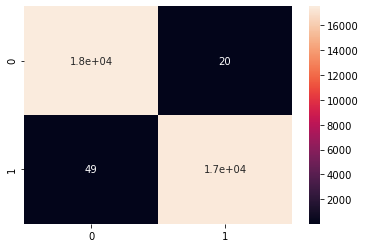

In [76]:
sns.heatmap(cm_op,annot=True)

### Feature importance

In [77]:
importance=optimal_clf.feature_importances_
len(importance)

82

In [78]:
features=pd.DataFrame({'feature':xtrain.columns,'Importance':importance})
features=features.sort_values('Importance',ascending=False)[:10]

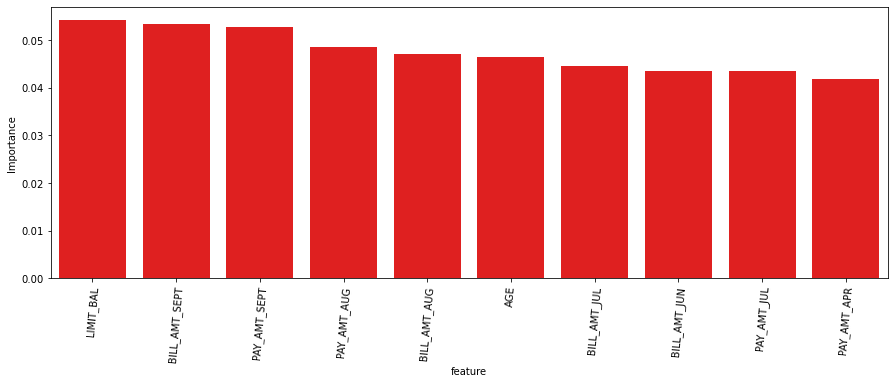

In [79]:
plt.figure(figsize=(15,5))
sns.barplot(x='feature',y='Importance',data=features.head(10),color='r')
plt.xticks(rotation=85)
plt.show()

**from the above feature importance graph we can say that the most important feature that make an impact on dependt variable are LIMIT_BAL , BILL_AMT_SEPT**

### Implement Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dtr=DecisionTreeClassifier()

In [82]:
para={'criterion':['gini',"entropy", "log_loss"],'min_samples_split':[2,5,10,20,25,50,70,85,100],
    'min_samples_leaf':[2,5,10,20,30,45,100]}

In [83]:
dtr_grid=GridSearchCV(DecisionTreeClassifier(),param_grid=para,cv=3,n_jobs=-1,scoring='accuracy',verbose=1)

In [84]:
dtr_grid.fit(xtrain,ytrain)

Fitting 3 folds for each of 189 candidates, totalling 567 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [2, 5, 10, 20, 30, 45, 100],
                         'min_samples_split': [2, 5, 10, 20, 25, 50, 70, 85,
                                               100]},
             scoring='accuracy', verbose=1)

In [85]:
optimal_dtr=dtr_grid.best_estimator_
optimal_dtr

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=100)

In [86]:
dtr_grid.best_score_

0.7525537864520916

In [87]:
dtr_grid.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 100}

In [88]:
dtr_test=optimal_dtr.predict(xtest)
dtr_train=optimal_dtr.predict(xtrain)

In [89]:
print(accuracy_score(ytest,dtr_test))
print(accuracy_score(ytrain,dtr_train))
train_accuracy_dtr=accuracy_score(ytrain,dtr_train)

0.7508988186954288
0.8168692575472236


In [90]:
accuracy_score_optimal_dtr=accuracy_score(ytest,dtr_test)
rcall_optimal_dtr=recall_score(ytest,dtr_test)
precision_score_optimal_dtr=precision_score(ytest,dtr_test)
f1_score_optimal_dtr=f1_score(ytest,dtr_test)

print('accuracy score for decision tree clssifier',accuracy_score_optimal_dtr)
print('the recall on the test data',rcall_optimal_dtr)
print('precision on the test data',precision_score_optimal_dtr)
print('f1 score of test data',f1_score_optimal_dtr)

accuracy score for decision tree clssifier 0.7508988186954288
the recall on the test data 0.7402044293015332
precision on the test data 0.7582897033158813
f1 score of test data 0.7491379310344828


### Feature Importance

In [91]:
importance_dtr=optimal_dtr.feature_importances_
len(importance_dtr)

82

In [92]:
feature_dtr=pd.DataFrame({'feature':xtrain.columns,'Importances':importance_dtr})
feature_dtr=feature_dtr.sort_values(ascending=False,by='Importances')[:10]

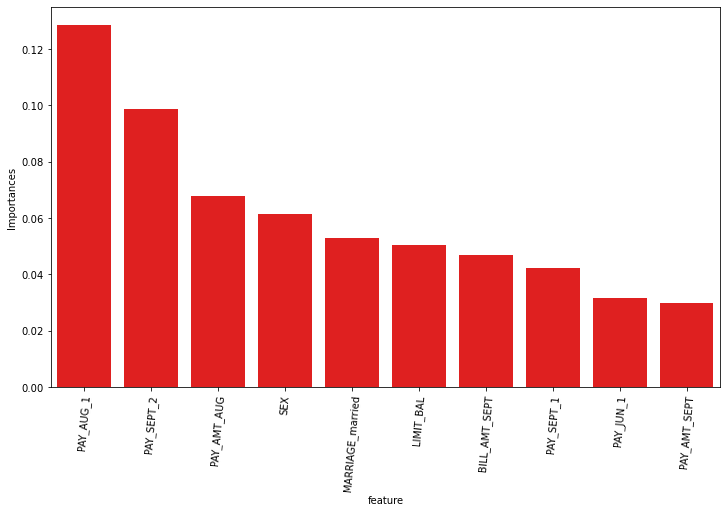

In [93]:
plt.figure(figsize=(12,7))
sns.barplot(x='feature',y='Importances',data=feature_dtr,color='r')
plt.xticks(rotation=85)
plt.show()

**from the above feature importance graph we can say that the most important feature that make an impact on dependt variable are PAY_AUG_1,PAY_AUG_2**

### XGBClassifier 

In [94]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [95]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [96]:
test_xgb_pred=xgb.predict(xtest)
train_xgb_pred=xgb.predict(xtrain)

In [97]:
print('score on test data',accuracy_score(ytest,test_xgb_pred))
print('score on train data',accuracy_score(ytrain,train_xgb_pred))

score on test data 0.8194658448895737
score on train data 0.8857786908634366


### Hyperparameter Tuning


**Hyperparameters are crucial as they control the overall behaviour of a machine learning model. The ultimate goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to give better results.**

**We can leverage the maximum power of XGBoost by tuning its hyperparameters**

In [98]:
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
    
}


In [99]:
xgb_search = GridSearchCV(estimator = XGBClassifier(  max_depth=5,learning_rate=0.1,n_estimators=140,
                min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                param_grid = param_test, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)

In [100]:
xgb_search.fit(xtrain,ytrain)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [101]:
optimal_xgb=xgb_search.best_estimator_

In [102]:
test_xgb_pred=optimal_xgb.predict(xtest)
train_xgb_pred=optimal_xgb.predict(xtrain)

In [103]:
print('score on test data',accuracy_score(ytest,test_xgb_pred))
print('score on train data',accuracy_score(ytrain,train_xgb_pred))
train_accuracy_xgb=accuracy_score(ytrain,train_xgb_pred)

score on test data 0.8296524567711009
score on train data 0.9124293785310734


In [104]:
accuracy_score_optimal_xgb=accuracy_score(ytest,test_xgb_pred)
rcall_optimal_xgb=recall_score(ytest,test_xgb_pred)
precision_score_optimal_xgb=precision_score(ytest,test_xgb_pred)
f1_score_optimal_xgb=f1_score(ytest,test_xgb_pred)

print('accuracy score for xgboost clssifier',accuracy_score_optimal_xgb)
print('the recall on the test data',rcall_optimal_xgb)
print('precision on the test data',precision_score_optimal_xgb)
print('f1 score of test data',f1_score_optimal_xgb)

accuracy score for xgboost clssifier 0.8296524567711009
the recall on the test data 0.7885860306643953
precision on the test data 0.8607288955001859
f1 score of test data 0.8230796586059743


### Feature importance

In [105]:
importance_xgb=optimal_xgb.feature_importances_
len(importance_xgb)

82

In [106]:
feature_xgb=pd.DataFrame({'features':xtrain.columns,'importances':importance_xgb})
feature_xgb=feature_xgb.sort_values(ascending=False,by='importances')[:10]
feature_xgb

,features,importances
34,PAY_AUG_1,0.186236
44,PAY_JUL_1,0.094414
25,PAY_SEPT_2,0.083318
54,PAY_JUN_1,0.057252
35,PAY_AUG_2,0.052054
74,PAY_APR_1,0.045078
64,PAY_MAY_1,0.042502
1,SEX,0.032424
19,MARRIAGE_married,0.030202
24,PAY_SEPT_1,0.028671


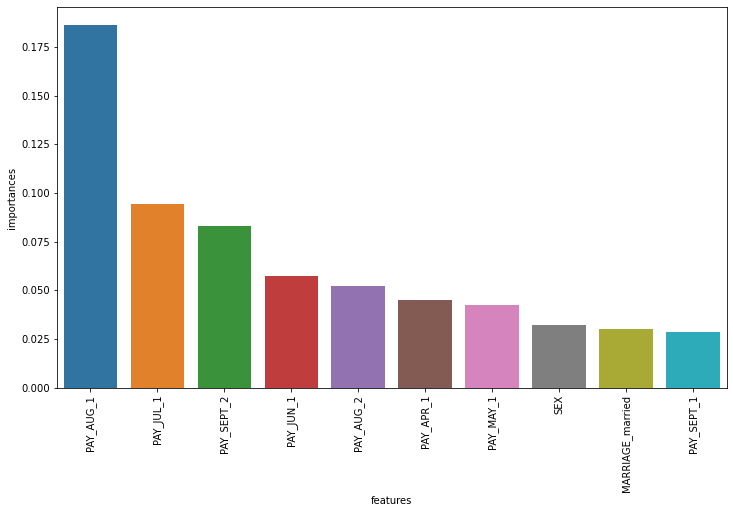

In [107]:
plt.figure(figsize=(12,7))
sns.barplot(x='features',y='importances',data=feature_xgb)
plt.xticks(rotation=90)
plt.show()

**from the above feature importance graph we can say that the most important feature that make an impact on dependt variable are PAY_AUG_1,PAY_JUL_1**

####  Evaluating the models

In [108]:
#create a table of all models all score for comparison 
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy_ = [accuracy_score_lr_train, train_accuracy_dtr, train_accuracy_rf, train_accuracy_xgb]
test_accuracy_ = [accuracy_score_lr, accuracy_score_optimal_dtr, accuracy_score_optimal_rf, accuracy_score_optimal_xgb]
precision_score_ = [precision_score_lr, precision_score_optimal_dtr, precision_score_optimal_rf, precision_score_optimal_xgb]
recall_score_ = [rcall_lr, rcall_optimal_dtr, rcall_optimal_rf, rcall_optimal_xgb]
f1_score_ = [f1_score_lr, f1_score_optimal_dtr, f1_score_optimal_rf, f1_score_optimal_xgb]


pd.DataFrame({'Classifier':classifiers,'train_accuracy':train_accuracy_ , 'Test Accuracy': test_accuracy_, 
              'Precision Score': precision_score_, 'Recall Score':recall_score_,'f1_score':f1_score_})

,Classifier,train_accuracy,Test Accuracy,Precision Score,Recall Score,f1_score
0,Logistic Regression,0.755358,0.752835,0.797886,0.683161,0.736080
1,Decision Tree,0.816869,0.750899,0.758290,0.740204,0.749138
2,Random Forest CLf,0.998031,0.838213,0.859855,0.810051,0.834211
3,Xgboost Clf,0.912429,0.829652,0.860729,0.788586,0.823080


## **Conclusion**

**Random forest model has the highest recall, if the business cares recall the most, then this model is the best candidate. If the balance of recall and precision is the most important metric, then xgboost is the ideal model. Since xgboost has slightly lower recall but much higher precision than Logistic Regression, I would recommend Random Forest.**



**Data categorical variables had minority classes which were added to their closest majority class**

**There were not huge gap but female clients tended to default the most.**

**Labels of the data were imbalanced and had a significant difference.**

**Random forest gave the highest accuracy of 83% on test dataset.**

**Repayment in the month of september tended to be the most important feature for our machine learning model.
The best accuracy is obtained for the Random forest and XGBoost classifier.**

**In general, all models have comparable accuracy. Nevertheless, because the classes are imbalanced (the proportion of non-default credit cards is higher than default) this metric is misleading.**

**Furthermore, accuracy does not consider the rate of false positives (non-default credits cards that were predicted as default) and false negatives (default credit cards that were incorrectly predicted as non-default).**

**Both cases have negative impact on the bank, since false positives leads to unsatisfied customers and false negatives leads to financial loss.**

**From above table we can see that XGBoost Classifier having Recall, F1-score ,precision score values equals 78%,	82%, and 86% and Random forest Classifier having Recall, F1-score, and precision score  Score values equals 81%	, 83%, and 85%.**

**XGBoost Classifier and Random forest classifier are giving us the best Recall, F1-score, and ROC Score among other algorithms.**

**We can conclude that these two algorithms are the best to predict whether the credit card is default or not default according to our analysis.**